In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
ill = pd.read_csv("idsp.csv", encoding='ISO-8859-1')  # or use 'ISO-8859-1' or 'cp1252' if needed
ill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6474 entries, 0 to 6473
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    6474 non-null   int64 
 1   week                    6474 non-null   int64 
 2   outbreak_starting_date  6474 non-null   object
 3   reporting_date          5455 non-null   object
 4   state                   6474 non-null   object
 5   district                6473 non-null   object
 6   disease_illness_name    6469 non-null   object
 7   status                  6474 non-null   object
 8   cases                   6474 non-null   int64 
 9   deaths                  6474 non-null   int64 
 10  unit                    6474 non-null   object
 11  note                    6 non-null      object
dtypes: int64(4), object(8)
memory usage: 607.1+ KB


In [40]:
aqi=pd.read_csv("aqi.csv")
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           235785 non-null  object 
 1   state                          235785 non-null  object 
 2   area                           235785 non-null  object 
 3   number_of_monitoring_stations  235785 non-null  int64  
 4   prominent_pollutants           235785 non-null  object 
 5   aqi_value                      235785 non-null  int64  
 6   air_quality_status             235785 non-null  object 
 7   unit                           235785 non-null  object 
 8   note                           0 non-null       float64
dtypes: float64(1), int64(2), object(6)
memory usage: 16.2+ MB


In [41]:
aqi['date'] = pd.to_datetime(aqi['date'], format="%d-%m-%Y", errors='coerce')
ill['outbreak_starting_date'] = pd.to_datetime(ill['outbreak_starting_date'], format="%d-%m-%Y", errors='coerce')


In [42]:
unique=ill['disease_illness_name'].unique()
unique

array(['Acute Diarrheal Disease', 'Chickenpox', 'Food Poisoning',
       'Fever with Rash', 'Measles', 'Hepatitis A', 'Typhoid', 'Malaria',
       'Shigellosis', 'Acute Gastroenteritis', 'Scrub Typhus',
       'Chikungunya', 'Mumps', 'Hepatitis A and E', 'Hepatitis B and C',
       'Leishmaniasis', 'Dengue', 'Human Rabies', 'West Nile Fever',
       'Cholera', 'HMPV', 'Mpox', 'Others', 'Fever', 'Meningitis',
       'Jaundice', 'Acute Hepatitis A', 'Rabies', 'Paratyphoid', nan,
       'Acute Hepatitis E', 'Pertussis', 'Rubella', 'Champaran',
       'Measles and Rubella', 'Hepatitis', 'Gastroenteritis',
       'Nile Fever', 'Poisoning', 'Nagar', 'Hepatitis E',
       'Crimean Congo Haemandrhagic Fever (CCHF)',
       'Japanese Encephalitis', 'Diarrhoea', 'Leptospirosis',
       'Acute Gastroenteritis (Norovirus)', 'Dengue and Chikungunya',
       'Dysentery', 'Diphtheria', 'Acute Hepatitis', 'Forest Disease',
       'Enteric Fever', 'Fever with rash', 'Scrub typhus', 'Zika Virus',
      

In [43]:
import pandas as pd

# Define keywords
respiratory_keywords = [
    'Acute Respiratory Illness', 
    'Acute Respiratandy Illness',
    'ARI Influenza Like Illness(ILI)', 
    'Fever and Upper Respiratandy Tract Infection (URTI)'
]

# Filter rows where 'disease_name' matches any keyword
import re

# Create a regex pattern for partial matches
pattern = '|'.join([re.escape(k) for k in respiratory_keywords])

# Use str.contains for partial, case-insensitive matching
asthma_df = ill[ill['disease_illness_name'].str.contains(pattern, case=False, na=False)]



In [44]:
asthma_df

,year,week,outbreak_starting_date,reporting_date,state,district,disease_illness_name,status,cases,deaths,unit,note
2004,2024,30,2024-07-23,24-07-2024,Kerala,Ernakulam,ARI Influenza Like Illness(ILI),Reported in Same Week,19,0,"cases in absolute number, deaths in absolute n...",NaN
5553,2022,52,2022-12-26,26-12-2022,Karnataka,Tumakuru,Fever and Upper Respiratandy Tract Infection (...,Reported in Same Week,25,0,"cases in absolute number, deaths in absolute n...",NaN
5560,2022,52,2022-12-10,22-12-2022,Karnataka,Tumakuru,Fever and Upper Respiratandy Tract Infection (...,Reported in Same Week,16,0,"cases in absolute number, deaths in absolute n...",NaN
5577,2022,51,2022-12-10,22-12-2022,Karnataka,Tumakuru,Fever and Upper Respiratandy Tract Infection (...,Reported in Same Week,16,0,"cases in absolute number, deaths in absolute n...",NaN
6145,2022,23,2022-08-06,06-09-2022,Jammu and Kashmir,Kupwara,Acute Respiratandy Illness,Reported in Same Week,18,0,"cases in absolute number, deaths in absolute n...",NaN
6146,2022,23,2022-06-06,06-06-2022,Jammu and Kashmir,Bandipora,Acute Respiratandy Illness,Reported in Same Week,32,0,"cases in absolute number, deaths in absolute n...",NaN


In [45]:
# Add year-week column to AQI data
aqi['year'] = aqi['date'].dt.year
aqi['week'] = aqi['date'].dt.isocalendar().week
aqi['state'] = aqi['state'].str.strip().str.lower()

# Average AQI per week per state
weekly_aqi = aqi.groupby(['year', 'week', 'state'])['aqi_value'].mean().reset_index()
weekly_aqi.rename(columns={'aqi_value': 'avg_weekly_aqi'}, inplace=True)
weekly_aqi

,year,week,state,avg_weekly_aqi
0,2022,13,andhra pradesh,58.666667
1,2022,13,assam,69.000000
2,2022,13,bihar,196.545455
3,2022,13,chandigarh,161.333333
4,2022,13,chhattisgarh,62.000000
...,...,...,...,...
4810,2025,18,telangana,70.333333
4811,2025,18,tripura,148.333333
4812,2025,18,uttar pradesh,119.500000
4813,2025,18,uttarakhand,119.888889


In [46]:
# Clean state names in asthma data
asthma_df['state'] = asthma_df['state'].str.strip().str.lower()

# Merge
merged_df = pd.merge(
    asthma_df,
    weekly_aqi,
    on=['year', 'week', 'state'],
    how='inner'
)
merged_df

C:\Users\91935\AppData\Local\Temp\ipykernel_23224\1040236523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asthma_df['state'] = asthma_df['state'].str.strip().str.lower()


,year,week,outbreak_starting_date,reporting_date,state,district,disease_illness_name,status,cases,deaths,unit,note,avg_weekly_aqi
0,2024,30,2024-07-23,24-07-2024,kerala,Ernakulam,ARI Influenza Like Illness(ILI),Reported in Same Week,19,0,"cases in absolute number, deaths in absolute n...",NaN,56.041667
1,2022,52,2022-12-26,26-12-2022,karnataka,Tumakuru,Fever and Upper Respiratandy Tract Infection (...,Reported in Same Week,25,0,"cases in absolute number, deaths in absolute n...",NaN,58.700000
2,2022,52,2022-12-10,22-12-2022,karnataka,Tumakuru,Fever and Upper Respiratandy Tract Infection (...,Reported in Same Week,16,0,"cases in absolute number, deaths in absolute n...",NaN,58.700000
3,2022,51,2022-12-10,22-12-2022,karnataka,Tumakuru,Fever and Upper Respiratandy Tract Infection (...,Reported in Same Week,16,0,"cases in absolute number, deaths in absolute n...",NaN,84.486111
4,2022,23,2022-08-06,06-09-2022,jammu and kashmir,Kupwara,Acute Respiratandy Illness,Reported in Same Week,18,0,"cases in absolute number, deaths in absolute n...",NaN,76.666667
5,2022,23,2022-06-06,06-06-2022,jammu and kashmir,Bandipora,Acute Respiratandy Illness,Reported in Same Week,32,0,"cases in absolute number, deaths in absolute n...",NaN,76.666667


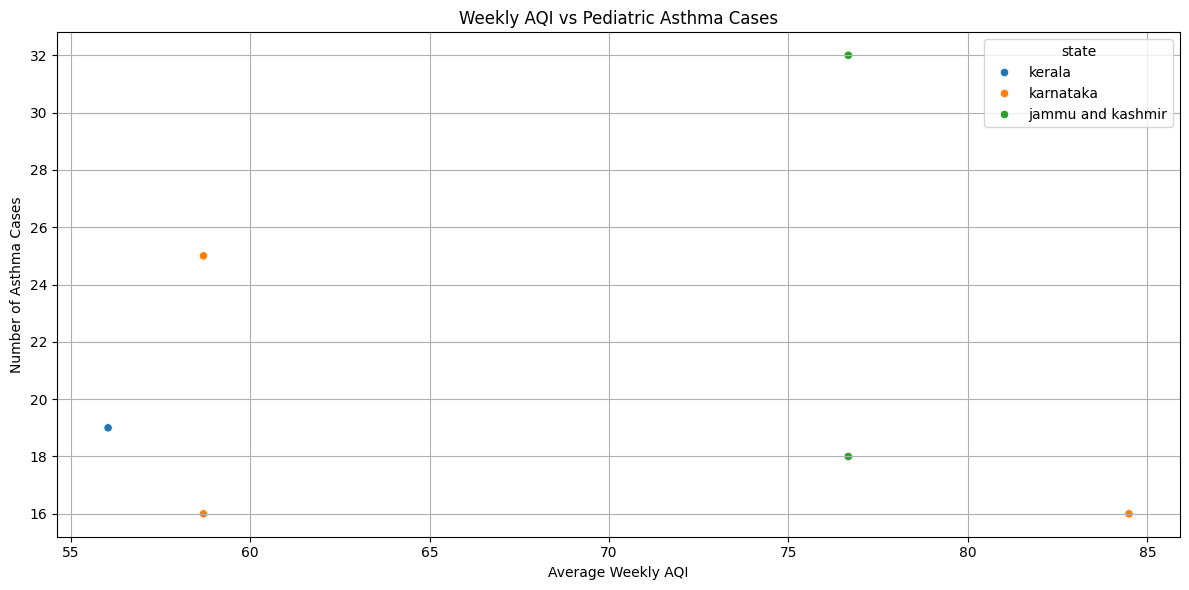

In [47]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=merged_df, x='avg_weekly_aqi', y='cases', hue='state')
plt.title("Weekly AQI vs Pediatric Asthma Cases")
plt.xlabel("Average Weekly AQI")
plt.ylabel("Number of Asthma Cases")
plt.grid(True)
plt.tight_layout()
plt.show()
